In [65]:
### Author : Prasad Meesala
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, model_selection, preprocessing, datasets

In [66]:
# Collecting the data

data = datasets.load_iris()
print(dir(data))

df = pd.DataFrame(data.data, columns = data.feature_names)
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 1, inplace = True)
df.head()

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [67]:
# Scaling the features

scaler = preprocessing.MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

X = df.copy()
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


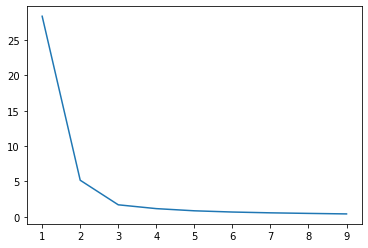

In [68]:
# Determining a better value of k by drawing the elbow graph

sse = []

for k in range(1, 10):
    kmeans = cluster.KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 10), sse)  # Elbow at k = 2
plt.show()

In [69]:
# Clustering the data by taking k = 2

kmeans = cluster.KMeans(n_clusters = 2)

y_predicted = kmeans.fit_predict(X)
print(y_predicted)

df['cluster'] = y_predicted

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


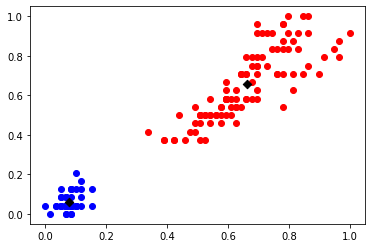

-5.176463590044367


In [71]:
# Visualizing the clusters

centroids = kmeans.cluster_centers_

df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = "red")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = "blue")
plt.scatter(centroids[:, 0], centroids[:, 1], color = "black", marker = 'D')
plt.show()

print(kmeans.score(X))